In [2]:
with open('Москва_2021.txt', 'r') as infile:
    dataraw = infile.read()
data = [(int(item), dataraw.count(item)) for item in sorted(set(dataraw.splitlines()))]
print(data)

[(14, 49), (15, 53), (16, 236), (17, 126), (18, 806), (19, 971), (20, 910), (21, 716), (22, 944), (23, 1071), (24, 810), (25, 1050), (26, 980), (27, 1263), (28, 1113), (29, 1340), (30, 734), (31, 1115), (32, 796), (33, 758), (34, 869), (35, 676), (36, 1198), (37, 522), (38, 1006), (39, 695), (40, 723), (41, 837), (42, 978), (43, 820), (44, 1032), (45, 690), (46, 677), (47, 831), (48, 1026), (49, 1060), (50, 150), (51, 188), (52, 193), (53, 47), (54, 26), (55, 62), (56, 76), (57, 136), (58, 262), (59, 74), (60, 266), (61, 226), (62, 139), (63, 183), (64, 189), (65, 79), (66, 188), (67, 128), (69, 202), (70, 26), (71, 85), (73, 17)]


In [3]:
average = sum(k[0] * k[1] for k in data) / sum(k[1] for k in data)
variance = sum((item[0] - average) ** 2 * item[1] for item in data) / sum(item[1] for item in data)
stddev = variance ** 0.5

mode = max(data, key=lambda x: x[1])

median = 0
total = 0
for value, freq in sorted(data):
    total += freq
    if total >= sum(k[1] for k in data) / 2:
        median = value
        break

range_val = max(k[0] for k in data) - min(k[0] for k in data)

variation_coefficient = stddev / average

In [4]:
assymetry = sum(((k[0] - average) ** 3) * k[1] for k in data) / sum(k[1] for k in data) / (stddev ** 3)
excess = sum(((k[0] - average) ** 4) * k[1] for k in data) / sum(k[1] for k in data) / (stddev ** 4) - 3

print(f'Ассиметрия {assymetry:.3f}')
print(f'Эксцесс {excess:.3f}')

Ассиметрия 0.623
Эксцесс -0.060


In [5]:
threshold = 0.5
three_sigma_rule = {1: 68.3, 2: 95.4, 3: 99.7}
rule_applies = True
total = sum(item[1] for item in data)
for i in range(1, 4):
    low = average - i * stddev
    high = average + i * stddev

    in_interval = [item for item in data if low <= item[0] <= high]
    count_in_interval = sum(item[1] for item in in_interval)
    percentage_in_interval = count_in_interval / total * 100

    print(f"Интервал [{low:.3f}, {high:.3f}]")
    print(f"Процент реализаций в интервале {i} сигм: {percentage_in_interval:.3f}%")
    if abs(three_sigma_rule[i]-percentage_in_interval) > threshold:
        print(f'В этом интервале правило 3 сигм НЕ соблюдается, ошибка на {abs(three_sigma_rule[i]-percentage_in_interval):.3f}%')
        rule_applies = False
    else:
        print('В этом интервале правило 3 сигм соблюдается')
print()
if rule_applies:
    print('Правило 3 сигм соблюдается для всех интервалов')
else:
    print('Правило 3 сигм НЕ соблюдается => распределение не нормальное')

Интервал [23.335, 47.411]
Процент реализаций в интервале 1 сигм: 66.351%
В этом интервале правило 3 сигм НЕ соблюдается, ошибка на 1.949%
Интервал [11.297, 59.449]
Процент реализаций в интервале 2 сигм: 94.670%
В этом интервале правило 3 сигм НЕ соблюдается, ошибка на 0.730%
Интервал [-0.741, 71.487]
Процент реализаций в интервале 3 сигм: 99.948%
В этом интервале правило 3 сигм соблюдается

Правило 3 сигм НЕ соблюдается => распределение не нормальное


[(14, 0.0015112728618573235), (15, 0.0031459149369274897), (16, 0.010424698516485212), (17, 0.014310828732689757), (18, 0.03916972519507757), (19, 0.06911760170249515), (20, 0.09718409770841686), (21, 0.11926718687351572), (22, 0.1483823211917466), (23, 0.18141442802948524), (24, 0.2063966937050859), (25, 0.23878111217345713), (26, 0.2690065694106036), (27, 0.3079603984825587), (28, 0.34228788205903216), (29, 0.3836165684853345), (30, 0.40625481910989114), (31, 0.44064398729297105), (32, 0.46519446072232673), (33, 0.4885729266261604), (34, 0.5153748881966506), (35, 0.536224285229621), (36, 0.5731733645868673), (37, 0.5892730469111434), (38, 0.6203004040341733), (39, 0.6417358048299047), (40, 0.664034790118126), (41, 0.6898497979829133), (42, 0.7200135706134534), (43, 0.7453042593220862), (44, 0.7771335163309996), (45, 0.798414705610215), (46, 0.8192949449464886), (47, 0.8449248989914567), (48, 0.8765691021805508), (49, 0.9092619436819541), (50, 0.9138882891774358), (51, 0.9196866421984

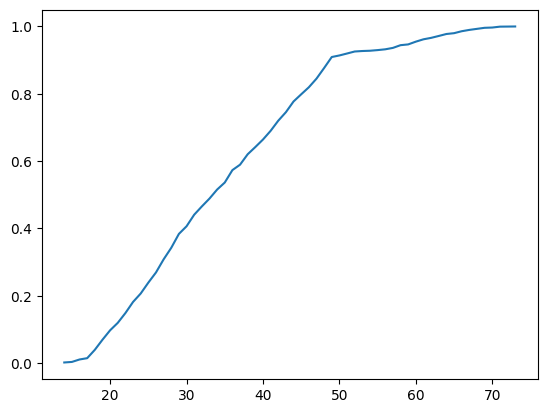

In [6]:
data_cum = []
cum = 0
for value, freq in sorted(data):
    cum += freq
    data_cum.append((value, cum/total))

print(data_cum)

from matplotlib import pyplot as plt

values, freqs = zip(*data_cum)
plt.plot(values, freqs)
plt.show()